In [128]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import datetime

In [129]:
dataset_name = "synthetic_retail_network_sales"

# Read Data

In [130]:
data = pd.read_csv("synthetic_retail_network_sales_full.csv", parse_dates=['date_time'])

In [131]:
data.head()

,org_id,date_time,Act_5_0__40944,Act_5_0__45308,Act_5_0__82324,Act_5_0__89097,Act_5_0__94157,Act_5_0__96723,is_holiday,pre_holiday,post_holiday
0,Org_5_0_97193107_86040,2013-02-01 07:30:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
1,Org_5_0_97193107_86040,2013-02-01 08:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
2,Org_5_0_97193107_86040,2013-02-01 08:30:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
3,Org_5_0_97193107_86040,2013-02-01 09:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0
4,Org_5_0_97193107_86040,2013-02-01 09:30:00,177.95,148.21,77.67,51.54,93.63,82.09,0,0,0


# Add Weekday column 

In [132]:
# Add a 'weekday' column to the dataset
data['weekday'] = (data['date_time'].dt.weekday + 1) % 7
data.head()

,org_id,date_time,Act_5_0__40944,Act_5_0__45308,Act_5_0__82324,Act_5_0__89097,Act_5_0__94157,Act_5_0__96723,is_holiday,pre_holiday,post_holiday,weekday
0,Org_5_0_97193107_86040,2013-02-01 07:30:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,5
1,Org_5_0_97193107_86040,2013-02-01 08:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,5
2,Org_5_0_97193107_86040,2013-02-01 08:30:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,5
3,Org_5_0_97193107_86040,2013-02-01 09:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,5
4,Org_5_0_97193107_86040,2013-02-01 09:30:00,177.95,148.21,77.67,51.54,93.63,82.09,0,0,0,5


# Daily Sales Volumes

In [133]:
data.columns

Index(['org_id', 'date_time', 'Act_5_0__40944', 'Act_5_0__45308',
       'Act_5_0__82324', 'Act_5_0__89097', 'Act_5_0__94157', 'Act_5_0__96723',
       'is_holiday', 'pre_holiday', 'post_holiday', 'weekday'],
      dtype='object')

In [134]:
SKUs = [c for c in data.columns if c not in ['org_id', 'date_time', 'weekday']]
SKUs

['Act_5_0__40944',
 'Act_5_0__45308',
 'Act_5_0__82324',
 'Act_5_0__89097',
 'Act_5_0__94157',
 'Act_5_0__96723',
 'is_holiday',
 'pre_holiday',
 'post_holiday']

In [135]:
# Group by date and sum across all SKUs to get daily volumes for each SKU
daily_sales = data.groupby(data['date_time'].dt.date)[SKUs].sum()
daily_sales.head()

,Act_5_0__40944,Act_5_0__45308,Act_5_0__82324,Act_5_0__89097,Act_5_0__94157,Act_5_0__96723,is_holiday,pre_holiday,post_holiday
date_time,,,,,,,,,
2013-02-01,26351.53,64430.67,70962.76,7315.95,15626.98,21515.87,0,0,0
2013-02-02,3218.91,9745.51,10937.52,4256.94,5288.34,10926.18,0,0,0
2013-02-04,3608.20,12955.40,21174.17,10018.05,19508.21,21948.22,0,0,0
2013-02-05,16557.33,23774.00,20107.72,7290.76,7441.33,14462.92,0,0,0
2013-02-06,10594.58,16024.00,28946.68,19128.00,22946.66,34579.02,0,0,0


In [136]:
daily_sales.tail(10)

,Act_5_0__40944,Act_5_0__45308,Act_5_0__82324,Act_5_0__89097,Act_5_0__94157,Act_5_0__96723,is_holiday,pre_holiday,post_holiday
date_time,,,,,,,,,
2013-08-17,4123.80,12871.90,10317.54,6997.96,12912.56,9884.21,0,0,0
2013-08-19,2382.39,11373.91,15647.99,16113.12,41752.58,19208.66,0,0,0
2013-08-20,11373.11,21888.85,16380.41,10535.63,14322.42,11563.32,0,0,0
2013-08-21,10052.48,19729.64,29468.47,32551.38,45657.86,32861.49,0,0,0
2013-08-22,21878.26,35116.53,47707.16,6196.43,13582.98,13346.13,0,0,0
2013-08-23,43804.29,83054.96,75810.26,5050.40,14921.05,9452.44,0,0,0
2013-08-24,4320.90,12343.32,10087.19,4538.52,7232.00,8027.42,0,0,0
2013-08-26,3112.64,15020.01,19005.43,11732.99,25489.32,13467.32,0,0,0
2013-08-27,15891.40,28356.04,19592.29,7578.69,7974.29,7578.02,0,0,0


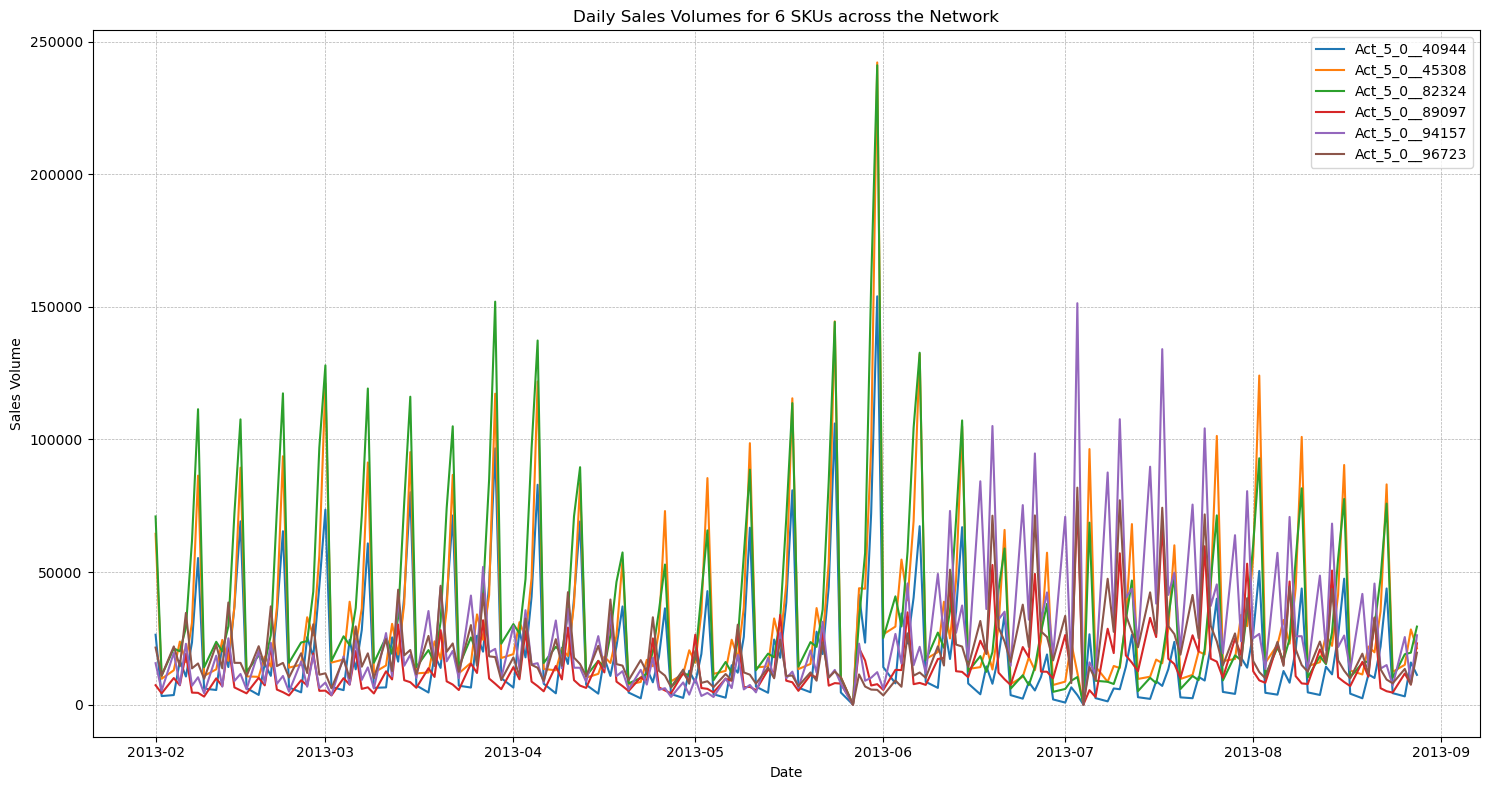

In [137]:
# Plotting daily sales for each SKU
plt.figure(figsize=(15, 8))
for column in daily_sales.columns:
    if column.startswith('Act_'):
        plt.plot(daily_sales.index, daily_sales[column], label=column)

plt.title('Daily Sales Volumes for 6 SKUs across the Network')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [138]:
# Calculate the correlation matrix for the daily sales of the SKUs
correlation_matrix = daily_sales.corr()

correlation_matrix

,Act_5_0__40944,Act_5_0__45308,Act_5_0__82324,Act_5_0__89097,Act_5_0__94157,Act_5_0__96723,is_holiday,pre_holiday,post_holiday
Act_5_0__40944,1.000000,0.940713,0.944112,-0.253522,-0.223114,-0.225334,-0.069963,-0.055152,0.049747
Act_5_0__45308,0.940713,1.000000,0.918492,-0.238119,-0.160191,-0.215299,-0.078307,-0.055427,0.025976
Act_5_0__82324,0.944112,0.918492,1.000000,-0.224897,-0.171157,-0.166068,-0.079193,-0.059216,0.013647
Act_5_0__89097,-0.253522,-0.238119,-0.224897,1.000000,0.890590,0.906350,-0.087162,-0.040530,0.034627
Act_5_0__94157,-0.223114,-0.160191,-0.171157,0.890590,1.000000,0.901356,-0.076902,-0.053020,-0.041319
Act_5_0__96723,-0.225334,-0.215299,-0.166068,0.906350,0.901356,1.000000,-0.107468,-0.053506,-0.084642
is_holiday,-0.069963,-0.078307,-0.079193,-0.087162,-0.076902,-0.107468,1.000000,-0.005618,-0.007967
pre_holiday,-0.055152,-0.055427,-0.059216,-0.040530,-0.053020,-0.053506,-0.005618,1.000000,-0.007967
post_holiday,0.049747,0.025976,0.013647,0.034627,-0.041319,-0.084642,-0.007967,-0.007967,1.000000
